In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import time
import datetime as datetime
import copy

# This is required to tell SpacePy where the NASA CDF file-loading library is at
import os
os.environ["CDF_LIB"] = '/shared/users/asousa/software/cdf36_3-dist/lib'

from spacepy import irbempy
from spacepy import coordinates as coord
from spacepy.time import Ticktock

from raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.axes_grid1 import make_axes_locatable


# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

1.00859592274


<IPython.core.display.Javascript object>


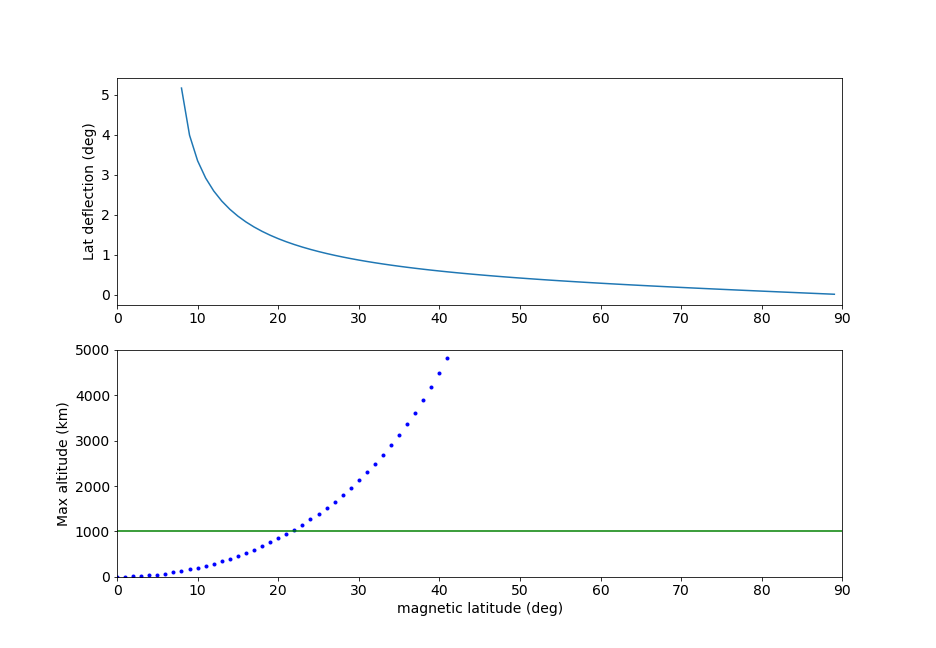

In [4]:
# Plot latitude offset due to dipole field line thru ionosphere:

surf_lats = np.arange(0,90,1)
R_E = 6371e3
r1 = R_E + 0
r2 = R_E + 110e3
D2R = np.pi/180.
R2D = 180./np.pi


print np.sqrt(r2/r1)
top_lats = R2D*np.arccos(np.sqrt(r2/r1)*np.abs(np.cos(D2R*surf_lats)))

Lshell = 1.0/pow(np.cos(D2R*surf_lats),2)
# print top_lats
fig, ax = plt.subplots(2,1)

ax[0].plot(surf_lats, surf_lats - top_lats)
ax[0].set_xlim([0,90])
ax[0].set_ylabel('Lat deflection (deg)')
ax[1].plot(surf_lats, (Lshell-1.0)*R_E*1e-3,'b.')
ax[1].plot([0,90],[1000,1000],'g')
ax[1].set_xlim([0,90])
ax[1].set_ylim([0,5000])
ax[1].set_ylabel('Max altitude (km)')
ax[1].set_xlabel('magnetic latitude (deg)')

<IPython.core.display.Javascript object>


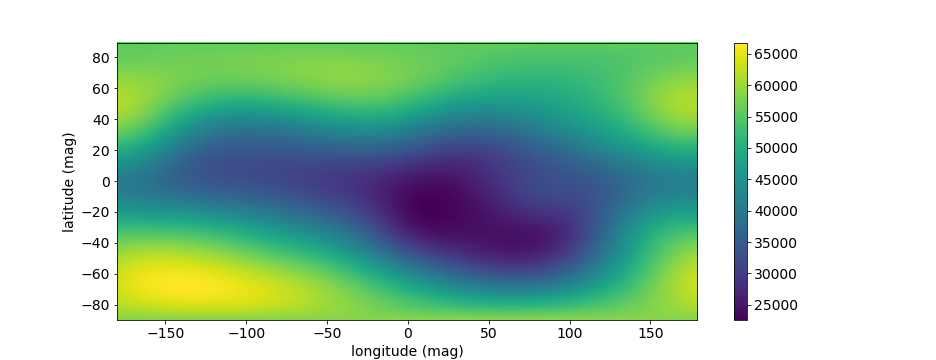

In [4]:
from spacepy import irbempy

t = datetime.datetime(2012,1,1,0,0,0)

lats = np.arange(-90,90)
lons = np.arange(-180,180)

inlats, inlons = np.meshgrid(lats, lons)

inlats = inlats.ravel()
inlons = inlons.ravel()
inalts = np.ones_like(inlats)

ticks = Ticktock([t for i in inlats], 'UTC')


# print inlats, inlons
tmp_coords = coord.Coords(zip(inalts, inlats, inlons),'MAG','sph',units=['Re','deg','deg'])
tmp_coords.ticks = ticks
tmp_coords = tmp_coords.convert('MAG','car')


Bf = irbempy.get_Bfield(tmp_coords.ticks, tmp_coords, extMag='0',options=[1,0,0,0,0], omnivals=None)


Bmag = np.reshape(Bf['Blocal'],[len(lons), len(lats)])

fig, ax = plt.subplots(1,1)
# ax.imshow((Bmag.T), origin='lower', interpolation='None')
p = ax.pcolorfast(lons, lats, Bmag.T)
ax.set_xlabel('longitude (mag)')
ax.set_ylabel('latitude (mag)')
cb = plt.colorbar(p)

# Mag_Eq = irbempy.find_magequator(ticks, tmp_coords, extMag='0', intMag='EDIP', omnivals=None)

# meq = Mag_Eq['loci']
# meq.ticks = ticks
# meq = meq.convert('MAG','sph')
# print meq



# trace_fieldline(incoord, bmodel)

-80 -180
-80 -160
-80 -140
-80 -120
-80 -100
-80 -80
-80 -60
-80 -40
-80 -20
-80 0
-80 20
-80 40
-80 60
-80 80
-80 100
-80 120
-80 140
-80 160
-80 180
-60 -180
-60 -160
-60 -140
-60 -120
-60 -100
-60 -80
-60 -60
-60 -40
-60 -20
-60 0
-60 20
-60 40
-60 60
-60 80
-60 100
-60 120
-60 140
-60 160
-60 180
-40 -180
-40 -160
-40 -140
-40 -120
-40 -100
-40 -80
-40 -60
-40 -40
-40 -20
-40 0
-40 20
-40 40
-40 60
-40 80
-40 100
-40 120
-40 140
-40 160
-40 180
-20 -180
-20 -160
-20 -140
-20 -120
-20 -100
-20 -80
-20 -60
-20 -40
-20 -20
-20 0
-20 20
-20 40
-20 60
-20 80
-20 100
-20 120
-20 140
-20 160
-20 180
0 -180
0 -160
0 -140
0 -120
0 -100
0 -80
0 -60
0 -40
0 -20
0 0
0 20
0 40
0 60
0 80
0 100
0 120
0 140
0 160
0 180
20 -180
20 -160
20 -140
20 -120
20 -100
20 -80
20 -60
20 -40
20 -20
20 0
20 20
20 40
20 60
20 80
20 100
20 120
20 140
20 160
20 180
40 -180
40 -160
40 -140
40 -120
40 -100
40 -80
40 -60
40 -40
40 -20
40 0
40 20
40 40
40 60
40 80
40 100
40 120
40 140
40 160
40 180
60 -180
60 -160
60 

<IPython.core.display.Javascript object>


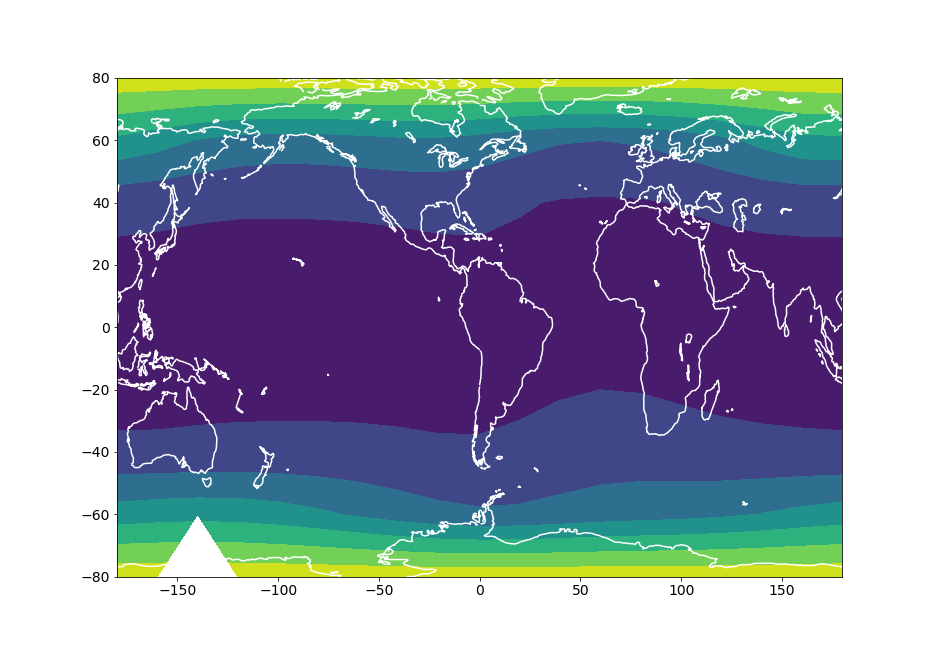

(-80, 80)

In [262]:

# incoord = coord.Coords([[1.1, 45, 0]],'MAG','sph',units=['Re','deg','deg'])
# t = datetime.datetime(2010,1,1,0,0,0)
# incoord.ticks= Ticktock(t)
# bmodel = 5

# # print tmp_coords[0].convert('GEO','car')
# fl = trace_fieldline(incoord, bmodel)
# fl.ticks = Ticktock([t for i in fl], 'UTC')
# fl = fl.convert('MAG','sph')


bmodel = 0
R_E = 6371.
H_M = 100
D2R = np.pi/180.

gridlats = np.arange(-80, 100, 20)
gridlons = np.arange(-180, 181, 20)

Lgrid = np.zeros([len(gridlats), len(gridlons)])
for latind, lat in enumerate(gridlats):
    for lonind, lon in enumerate(gridlons):
        print lat, lon
        incoord = coord.Coords([[(R_E + H_M)/R_E, lat, lon]],'MAG','sph',units=['Re','deg','deg'])
        t = datetime.datetime(2010,1,1,0,0,0)
        incoord.ticks= Ticktock(t)
        incoord = incoord.convert('MAG','car')
        # print tmp_coords[0].convert('GEO','car')
#         fl = trace_fieldline(incoord, bmodel)
#         fl.ticks = Ticktock([t for i in fl], 'UTC')
#         fl = fl.convert('MAG','sph')
#         eqloc = np.argmax(fl.radi)
#         Lsh = np.max(fl.radi)
        LB = irbempy.get_Lm(incoord.ticks, incoord, [90], extMag='0',intMag='IGRF')
        Lsh = LB['Lm'][0][0]
#         print Lsh

#         
#         analytic_Lsh = 1.0/pow(np.cos(D2R*lat),2)

#         print Lsh, analytic_Lsh
        Lgrid[latind, lonind] = Lsh

LGC = np.clip(np.abs(Lgrid), 0,10)
fig, ax = plt.subplots(1,1)
ax.contourf(gridlons, gridlats, LGC, n=3)
ax.plot(coast_lon_mag, coast_lat_mag, 'w')
ax.set_xlim([-180,180])
ax.set_ylim([-80,80])
    
# fig, ax = plt.subplots(1,1)
# x = fl.radi*np.cos(fl.lati*np.pi/180.)
# y = fl.radi*np.sin(fl.lati*np.pi/180.)
# ax.plot(x,y,'r')
# ax.set_aspect('equal')



<IPython.core.display.Javascript object>


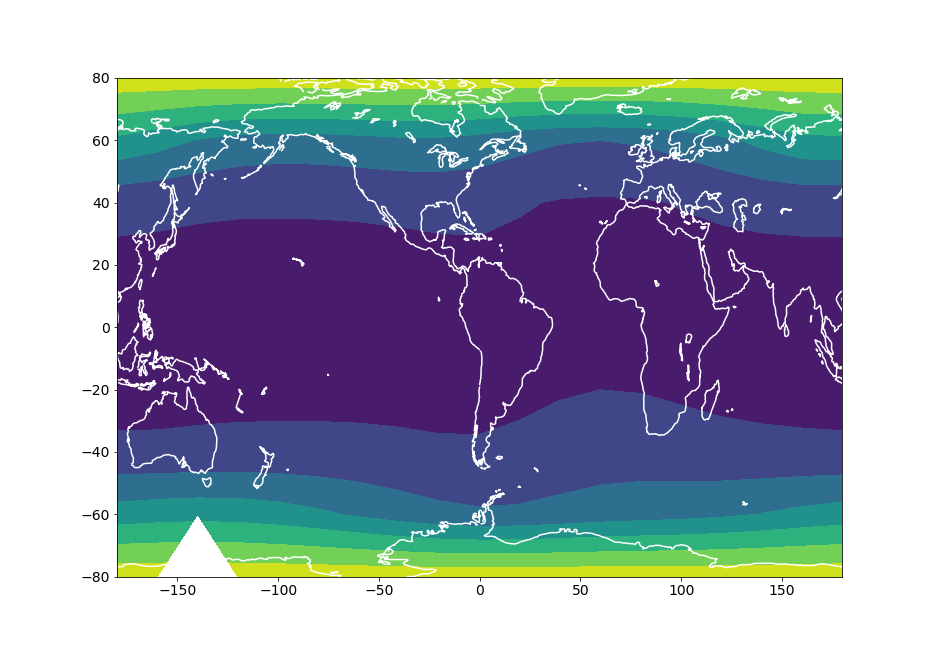

(-80, 80)

In [263]:


LGC = np.clip(np.abs(Lgrid), 1,10)
fig, ax = plt.subplots(1,1)
cmap = plt.cm.get_cmap("winter")
levels = [1, 1.1, 1.5, 2, 3, 4, 5, 10]
ax.contourf(gridlons, gridlats, LGC)

ax.plot(coast_lon_mag, coast_lat_mag, 'w')
ax.set_xlim([-180,180])
ax.set_ylim([-80,80])


In [304]:
incoord = coord.Coords([[1.1, 45, 0]],'MAG','sph',units=['Re','deg','deg'])
t = datetime.datetime(2010,1,1,0,0,0)
incoord.ticks= Ticktock(t)
bmodel = 5

incoord = incoord.convert('MAG','car')

LB = irbempy.get_Lm(incoord.ticks, incoord, [90], extMag='0',intMag='CDIP')

# LB = irbempy.get_Lstar(incoord.ticks, incoord, options=[1,0,0,0,5]) 
print LB
print 1.0/pow(np.cos(D2R*45.0),2)


{'Xj': array([[ 3.17558608]]), 'Bmirr': array([[ 35568.94096842]]), 'Lm': array([[ 2.19799817]]), 'Bmin': array([ 2811.97116465]), 'MLT': array([ 23.94476047])}
2.0


<IPython.core.display.Javascript object>


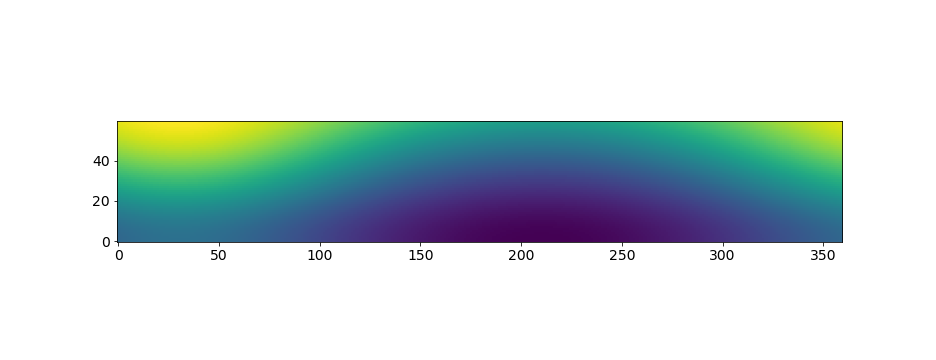

In [63]:
Bmag = np.reshape(Bf['Blocal'],[len(lons), len(lats)])

fig, ax = plt.subplots(1,1)
ax.imshow(Bmag.T, origin='lower', interpolation='None')

In [7]:
import os
os.environ["CDF_LIB"] = '/shared/users/asousa/software/cdf36_3-dist/lib'

import spacepy.omni as om
# om.omnirange()
import spacepy.toolbox
spacepy.toolbox.update()

Qin-Denton/OMNI2 data not found in current format. This module has limited functionality.
Run spacepy.toolbox.update(QDomni=True) to download data
Retrieving Qin_Denton file ...
Download Progress ...100%

Now processing (this may take a minute) ...
Now saving... 
Retrieving OMNI2 file ...
Download Progress ...100%

Retrieving leapseconds file ... 


'/home/asousa/.spacepy/data'

In [6]:
import os
os.environ["CDF_LIB"] = '/shared/users/asousa/software/cdf36_3-dist/lib'


In [48]:
import copy
def trace_fieldline(incoord, bmodel, max_steps=5000, max_angle = 0.5):
    # Bmodel index number (from irbempy)
    #             - 0 = IGRF
    #             - 1 = Eccentric tilted dipole
    #             - 2 = Jensen&Cain 1960
    #             - 3 = GSFC 12/66 updated to 1970
    #             - 4 = User-defined model (Default: Centred dipole + uniform [Dungey open model] )
    #             - 5 = Centred dipole
    max_stepsize=0.1
    stepsize = max_stepsize  # Initially...
 
    cur_pos = incoord.convert('MAG','sph')
    start_alt = cur_pos.radi
    cur_pos = incoord.convert('MAG','car')
    in_time = cur_pos.ticks[0]
    
    prev_pos = coord.Coords(cur_pos.data, 'MAG','car')
    print prev_pos
    # Step one step to find out propagation direction:
    B = irbempy.get_Bfield(cur_pos.ticks, cur_pos, extMag='0',options=[1,0,0,0,bmodel], omnivals=None) 
    bdir = B['Bvec']/(1.0*np.linalg.norm(B['Bvec']))
    tmp_data = copy.copy(cur_pos.data)
    tmp_data += stepsize*bdir
    
    stepsign = 1 - 2.0*(np.linalg.norm(tmp_data) < np.linalg.norm(cur_pos.data))
#     print "stepsign is: ", stepsign

    ov = []
    opts = [0,0,0,0,int(bmodel)]
    count = 0
#     for x in range(max_steps):
    while(1):
        B = irbempy.get_Bfield(cur_pos.ticks, cur_pos, extMag='0',options=[1,0,0,0,bmodel], omnivals=None)
        
        bdir = B['Bvec']/np.linalg.norm(B['Bvec'])
        
        # Get error at this next step size:
        p1 = np.array([cur_pos.x[0], cur_pos.y[0], cur_pos.z[0]])
        p2 = p1 + stepsign*stepsize*bdir.ravel()
        step_angle = R2D*np.arccos(np.dot(p1, p2)/np.linalg.norm(p1)/np.linalg.norm(p2))

        # Refine step size if we're over our threshold
        if step_angle > max_angle:
            stepsize*=0.5
            print "down"
        else:
#             print count, stepsize
            cur_pos.x += stepsign*stepsize*bdir[:,0]
            cur_pos.y += stepsign*stepsize*bdir[:,1]
            cur_pos.z += stepsign*stepsize*bdir[:,2]

            ov.append([cur_pos.x[0], cur_pos.y[0], cur_pos.z[0]])
            count += 1
            
            # bump up for speed if we're doing fine
            if (step_angle < max_angle/2.0) and (stepsize < max_stepsize):
                stepsize*=2.0
                print "up"
        if (len(ov) > 0) and (np.linalg.norm(ov[-1]) < start_alt):
#             print "reached Earth"
            break
        if (count > max_steps):
            print "Exceeded max steps"
            break
    
    ov = np.array(ov)
    
    outs = coord.Coords(ov,'MAG','car')
    
    return outs



R_E = 6371e3
r1 = R_E + 0
r2 = R_E + 110e3
D2R = np.pi/180.
R2D = 180./np.pi


gridlats = np.arange(40, 90, 160)
gridlons = np.arange(0, 180, 360)
H_M = 0
bmodel=0


mirror_grid = np.zeros([len(gridlats), len(gridlons),2])
for latind, lat in enumerate(gridlats):
    for lonind, lon in enumerate(gridlons):
        print lat, lon
        incoord = coord.Coords([[(R_E + H_M)/R_E, lat, lon]],'MAG','sph',units=['Re','deg','deg'])
        t = datetime.datetime(2010,1,1,0,0,0)
        incoord.ticks= Ticktock(t)
        incoord = incoord.convert('MAG','car')

        fl = trace_fieldline(incoord, bmodel)
        LB = irbempy.get_Lm(incoord.ticks, incoord, [90], extMag='0',intMag='IGRF')
        print LB

        outcoord = fl[-1]
        outcoord.ticks = incoord.ticks
        outcoord = outcoord.convert('MAG','sph')
        
        print outcoord
        
        r = [x.convert('MAG','sph').radi[0] for x in fl]
        print "My L-shell", np.max(r)


40 0
Coords( [[0.766044443118978, 0.0, 0.6427876096865394]] , 'MAG', 'car')
down
down
down
down
{'Xj': array([[ 0.10105977]]), 'Bmirr': array([[ 32620.9745096]]), 'Lm': array([[-1.01686063]]), 'Bmin': array([ 28419.85879442]), 'MLT': array([ 14.72292981])}
Coords( [[0.9994398124833547, -8.292777882808522, -61.71850746081498]] , 'MAG', 'sph')
My L-shell 1.11610206161


In [45]:
r = [x.convert('MAG','sph').radi[0] for x in fl]
print np.max(r)

1.11610206161


In [80]:
from spacepy import pycdf

cdf = pycdf.CDF('OMNI_OMNI2_merged_20120213-v1.cdf')
Kp = cdf['Kp_index'][...]


print cdf
# fig, ax = plt.subplots(1,1)
# ax.plot(Kp/10.)


AE_index: CDF_DOUBLE [438312]
AL_index: CDF_DOUBLE [438312]
AU_index: CDF_DOUBLE [438312]
Alfven_mach_number: CDF_DOUBLE [438312]
Ap_index: CDF_DOUBLE [438312]
Bartels_rotation_num: CDF_DOUBLE [438312]
Bx_GSE: CDF_DOUBLE [438312]
By_GSE: CDF_DOUBLE [438312]
By_GSM: CDF_DOUBLE [438312]
Bz_GSE: CDF_DOUBLE [438312]
Bz_GSM: CDF_DOUBLE [438312]
Decimal_Day: CDF_DOUBLE [438312]
Dst_index: CDF_DOUBLE [438312]
Electric_field_GSM: CDF_DOUBLE [438312]
Epoch: CDF_EPOCH [438312]
Field_mag_ave: CDF_DOUBLE [438312]
Flow_pressure: CDF_DOUBLE [438312]
Hour: CDF_DOUBLE [438312]
IMF_spacecraft_ID: CDF_DOUBLE [438312]
Ion_density: CDF_DOUBLE [438312]
Kp_index: CDF_DOUBLE [438312]
Lat_angle_ave_field_vector: CDF_DOUBLE [438312]
Long_angle_ave_field_vector: CDF_DOUBLE [438312]
Mag_of_ave_field_vect: CDF_DOUBLE [438312]
Na_over_Np: CDF_DOUBLE [438312]
Num_pts_in_IMF_aves: CDF_DOUBLE [438312]
Num_pts_in_plasma_aves: CDF_DOUBLE [438312]
PC_N_index: CDF_DOUBLE [438312]
Plasma_beta: CDF_DOUBLE [438312]
Plasma_b

(13104, 6)
(13104, 7)
(39312, 7)


<IPython.core.display.Javascript object>


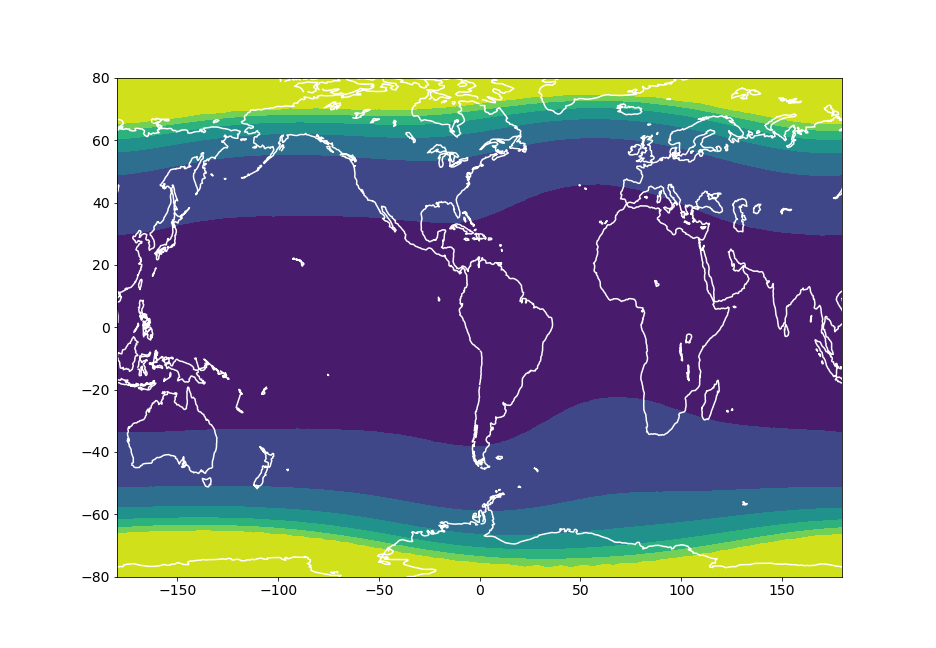

(-80, 80)

In [29]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

# Load table of values from NASA web utility:
# (https://omniweb.gsfc.nasa.gov/vitmo/cgm_vitmo.html)
import xflib
xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')

itime = datetime.datetime(2010,1,1,0,0,0)
dgrid = np.load('omni_IGRF.npy') #np.loadtxt('omni_IGRF.txt')
print np.shape(dgrid)

dgrid[:,0]*=1e3
dgrid[:,0]+= R_E
dgrid[:,0]/=R_E

glat = dgrid[:,1] # Geo latitude
glon = dgrid[:,2] # Geo longitude
gclat= dgrid[:,3] # Geo conjugate latitude
gclon= dgrid[:,4] # Geo conjugate longitude
Lsh  = dgrid[:,5] # L-shell



mgrid = []
for row in dgrid:
    mpoint = xf.rllgeo2rllmag(row[0:3], itime)
    cpoint = xf.rllgeo2rllmag([row[0], row[3], row[4]], itime)
    
    newrow = []
    newrow.extend(mpoint)
    newrow.extend(cpoint)
    newrow.extend([row[5]])
    mgrid.append(newrow)
    
    
mgrid = np.array(mgrid)
print np.shape(mgrid)

temp_lons = mgrid[:,2]
mgrid[temp_lons > 180.,2]-=360.


mleft = copy.copy(mgrid)
mleft[:,2]= mleft[:,2] - 360
mright = copy.copy(mgrid)
mright[:,2]+=360


mgrid = np.vstack([mgrid, mleft, mright])#, mup, mdown])
print np.shape(mgrid)

fig, ax = plt.subplots(1,1)
# ax[0].scatter(mgrid[:,2], mgrid[:,1], c=np.clip(mgrid[:,6],0,5))


mlats = np.arange(-90,90, 1)
mlons = np.arange(-185,365,1)

plats, plons = np.meshgrid(mlats, mlons)

points = zip(plats.ravel(), plons.ravel())

gd = interpolate.griddata(mgrid[:,1:3],np.clip(mgrid[:,-1],1,10), points, fill_value=0, method='linear')

gd = gd.reshape(len(mlons), len(mlats))
ax.contourf(mlons, mlats, gd.T)
ax.plot(coast_lon_mag, coast_lat_mag, 'w')
ax.set_xlim([-180,180])
ax.set_ylim([-80,80])

# lats = np.unique(glat)
# lons = np.unique(glon)
# nlats = len(np.unique(glat))
# nlons = len(np.unique(glon))

# print np.shape(Lsh)
# grid = np.reshape(dgrid, [nlats, nlons,6])

# print np.shape(grid[:,:,5])

# fig, ax = plt.subplots(1,1)
# ax.contourf(lons, lats, np.clip(grid[:,:,5],0,10))

In [24]:
lint = interpolate.RectBivariateSpline(mlats, mlons, gd.T)
lint(np.arange(20,60),200)


array([[ 1.1973461 ],
       [ 1.21922435],
       [ 1.23930276],
       [ 1.2592508 ],
       [ 1.27919806],
       [ 1.30143063],
       [ 1.32903015],
       [ 1.35848898],
       [ 1.38622284],
       [ 1.41561156],
       [ 1.45050895],
       [ 1.48540453],
       [ 1.52029757],
       [ 1.56143444],
       [ 1.60572302],
       [ 1.6513752 ],
       [ 1.70120758],
       [ 1.75265699],
       [ 1.80678285],
       [ 1.8649858 ],
       [ 1.92900997],
       [ 1.99701398],
       [ 2.07090716],
       [ 2.14869514],
       [ 2.23243234],
       [ 2.32189718],
       [ 2.42043211],
       [ 2.52640197],
       [ 2.64469534],
       [ 2.77009658],
       [ 2.90794927],
       [ 3.05434588],
       [ 3.21676656],
       [ 3.39063192],
       [ 3.58741275],
       [ 3.79661899],
       [ 4.03265072],
       [ 4.28593093],
       [ 4.57996797],
       [ 4.89410256]])

<IPython.core.display.Javascript object>


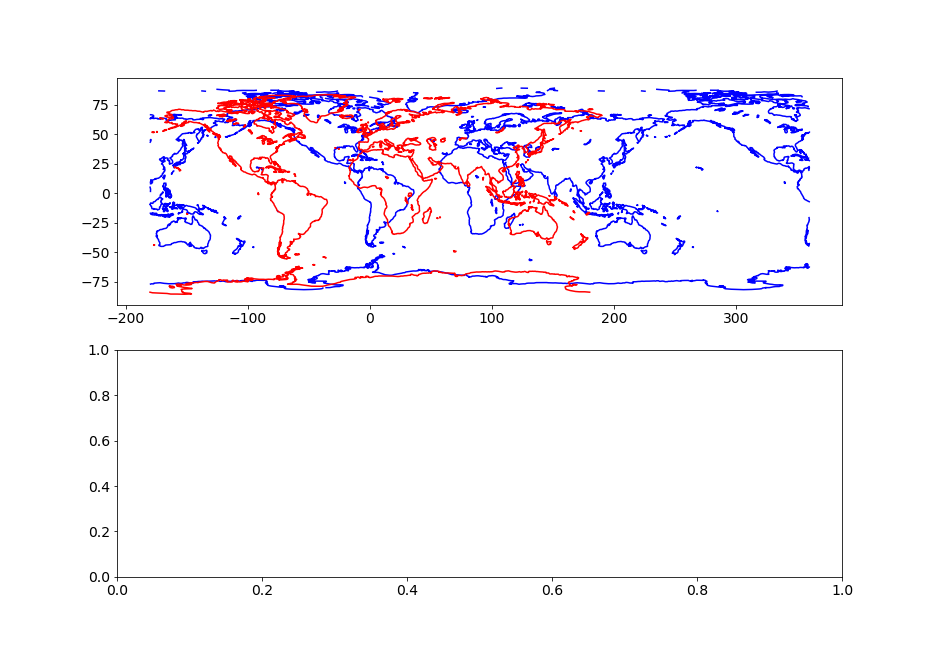

In [6]:
import scipy.io
import xflib

# Convert the Matlab coastline datafile to geomagnetic coordinates:

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')
coastlines = scipy.io.loadmat('coastlines.mat')

coast_lat_mag = np.zeros(len(coastlines['lat']))
coast_lon_mag = np.zeros(len(coastlines['long']))

for ind, (lat, lon) in enumerate(zip(coastlines['lat'], coastlines['long'])):
    if np.isnan(lat) or np.isnan(lon):
        coast_lat_mag[ind] = np.nan
        coast_lon_mag[ind] = np.nan
    else:
        tmpcoords = [1, lat[0], lon[0]]
        tmp_mag = xf.rllgeo2rllmag(tmpcoords, itime)
        coast_lat_mag[ind] = tmp_mag[1]
        coast_lon_mag[ind] = tmp_mag[2]

# Loop around for -180 + 180 ranges
coast_lat_mag = np.concatenate([coast_lat_mag, coast_lat_mag[coast_lon_mag > 180]])
coast_lon_mag = np.concatenate([coast_lon_mag, (coast_lon_mag[coast_lon_mag > 180] - 360)])

# Toss in some NaNs to break up the continents
for ind in range(len(coast_lat_mag) -1):
    if ((np.abs(coast_lat_mag[ind+1] - coast_lat_mag[ind]) > 5) or
       (np.abs(coast_lon_mag[ind+1] - coast_lon_mag[ind]) > 5)):
        coast_lat_mag[ind] = np.nan
        coast_lon_mag[ind] = np.nan

    
fig, ax = plt.subplots(2,1)
ax[0].plot(coast_lon_mag, coast_lat_mag, 'b')
ax[0].plot(coastlines['long'],coastlines['lat'],'r')

In [382]:
# Pull data from the omniweb page!
# Iterate by constant latitudes

waddy = 'https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi'
model='cgm'
year = 2010
geo_flag=1
latitude=45
longitude=270
height=100
profile=3
start=0
stop=360
step=10
form=0
# alt, glat, glon, cglat, cglon, Lsh
varz=[1,2,3,12,13,42]

latstep = 2
lonstep = 2
targ_lats = np.hstack([np.arange(-90 + latstep, -19,latstep), np.arange(20,90,latstep)])
targ_lons = np.arange(0,360+lonstep + 1,lonstep)

splitting_inds = np.arange(0,len(targ_lons), 40)

if splitting_inds[-1]!= len(targ_lons) - 1:
    splitting_inds = np.hstack([splitting_inds, [len(targ_lons)-1]])
splitting_ind_pairs = zip(splitting_inds[0:-1], splitting_inds[1:])
for pair in splitting_ind_pairs:
    print targ_lons[pair[0]:pair[1]]
    
data = []
for latitude in targ_lats:
    for pair in splitting_ind_pairs:
        start = targ_lons[pair[0]]
        stop  = targ_lons[pair[1]-1]
        outfile = 'omni_%d_%d.txt'%(latitude, start)

        cmd_str = 'wget --no-check-certificate --post-data "model=%s&year=%d&height=%g&geo_flag=%d&'%(model,year,height,geo_flag) + \
                  'latitude=%d&longitude=%d&profile=%d&start=%d&stop=%d&'%(latitude, longitude, profile, start, stop) +\
                  'step=%d&format=%d&'%(lonstep,form)
        for v in varz:
            cmd_str = cmd_str + 'vars=%d&'%(v)

        cmd_str += '" ' + waddy

        cmd_str += ' -O %s'%(outfile)
        print cmd_str

        os.system(cmd_str)
        print "reading file ", outfile
        with open(outfile) as file:
            st = ''
            # Skip thru until the header row:
            while not '       1      2       3      4       5      6' in st:
                st = file.readline()
            st = file.readline()
            while not '<hr></pre>' in st:
                data.append(st.split())
                st = file.readline()
                
data = np.array(data, dtype='float')

with open('omni_IGRF.npy','w') as f:
    np.save(f,data)



[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78]
[ 80  82  84  86  88  90  92  94  96  98 100 102 104 106 108 110 112 114
 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150
 152 154 156 158]
[160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228 230
 232 234 236 238]
[240 242 244 246 248 250 252 254 256 258 260 262 264 266 268 270 272 274
 276 278 280 282 284 286 288 290 292 294 296 298 300 302 304 306 308 310
 312 314 316 318]
[320 322 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354
 356 358 360]
wget --no-check-certificate --post-data "model=cgm&year=2010&height=100&geo_flag=1&latitude=-88&longitude=270&profile=3&start=0&stop=78&step=2&format=0&vars=1&vars=2&vars=3&vars=12&vars=13&vars=42&" https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi -O omni_-88_0.txt
reading file  omni_-88_0.

In [392]:
# Longitude version:
# Pull data from the omniweb page!

waddy = 'https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi'
model='cgm'
year = 2010
geo_flag=1
latitude=45
longitude=270
height=100
profile=2
start=0
stop=360
step=10
form=0
# alt, glat, glon, cglat, cglon, Lsh
varz=[1,2,3,12,13,42]

latstep = 2
lonstep = 2
# targ_lats = np.hstack([np.arange(-90 + latstep, -19,latstep), np.arange(20,90,latstep)])
targ_lats_SH = np.arange(-90, -19, latstep)
targ_lats_NH = np.arange(20, 90+latstep, latstep)

targ_lons = np.arange(0,360+lonstep + 1,lonstep)

splitting_inds = np.arange(0,len(targ_lons), 40)

# if splitting_inds[-1]!= len(targ_lons) - 1:
#     splitting_inds = np.hstack([splitting_inds, [len(targ_lons)-1]])
# splitting_ind_pairs = zip(splitting_inds[0:-1], splitting_inds[1:])
# for pair in splitting_ind_pairs:
#     print targ_lons[pair[0]:pair[1]]
    
    
pairs = [(targ_lats_SH[0], targ_lats_SH[-1]),
         (targ_lats_NH[0], targ_lats_NH[-1])]
data = []
# for latitude in targ_lats:
for longitude in targ_lons:
    for pair in pairs:
        start = pair[0]
        stop  = pair[1]
        outfile = 'omni_%d_%d.txt'%(longitude, start)

        cmd_str = 'wget --no-check-certificate --post-data "model=%s&year=%d&height=%g&geo_flag=%d&'%(model,year,height,geo_flag) + \
                  'latitude=%d&longitude=%d&profile=%d&start=%d&stop=%d&'%(latitude, longitude, profile, start, stop) +\
                  'step=%d&format=%d&'%(lonstep,form)
        for v in varz:
            cmd_str = cmd_str + 'vars=%d&'%(v)

        cmd_str += '" ' + waddy

        cmd_str += ' -O %s'%(outfile)
        print cmd_str

        os.system(cmd_str)
        print "reading file ", outfile
        with open(outfile) as file:
            st = ''
            # Skip thru until the header row:
            while not '       1      2       3      4       5      6' in st:
                st = file.readline()
            st = file.readline()
            while not '<hr></pre>' in st:
                data.append(st.split())
                st = file.readline()
                
#         print data
data = np.array(data, dtype='float')

with open('omni_IGRF.npy','w') as f:
    np.save(f,data)




wget --no-check-certificate --post-data "model=cgm&year=2010&height=100&geo_flag=1&latitude=45&longitude=0&profile=2&start=-90&stop=-20&step=2&format=0&vars=1&vars=2&vars=3&vars=12&vars=13&vars=42&" https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi -O omni_0_-90.txt
reading file  omni_0_-90.txt
wget --no-check-certificate --post-data "model=cgm&year=2010&height=100&geo_flag=1&latitude=45&longitude=0&profile=2&start=20&stop=90&step=2&format=0&vars=1&vars=2&vars=3&vars=12&vars=13&vars=42&" https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi -O omni_0_20.txt
reading file  omni_0_20.txt
wget --no-check-certificate --post-data "model=cgm&year=2010&height=100&geo_flag=1&latitude=45&longitude=2&profile=2&start=-90&stop=-20&step=2&format=0&vars=1&vars=2&vars=3&vars=12&vars=13&vars=42&" https://omniweb.gsfc.nasa.gov/cgi/vitmo/vitmo_model.cgi -O omni_2_-90.txt
reading file  omni_2_-90.txt
wget --no-check-certificate --post-data "model=cgm&year=2010&height=100&geo_flag=1&latitude=45&lon

In [373]:
with open(outfile) as file:
    st = ''
    # Skip thru until the header row:
    while not '       1      2       3      4       5      6' in st:
        st = file.readline()
    st = file.readline()
    while not '<hr></pre>' in st:
        data.append(st.split())
        st = file.readline()
        print st
                

    100. -85.00   25.00  66.59  304.88  11.55

    100. -85.00   30.00  67.02  305.21  12.04

    100. -85.00   35.00  67.45  305.44  12.59

    100. -85.00   40.00  67.87  305.56  13.20

    100. -85.00   45.00  68.29  305.59  13.87

    100. -85.00   50.00  68.70  305.51  14.61

    100. -85.00   55.00  69.10  305.31  15.42

    100. -85.00   60.00  69.48  305.00 999.99

    100. -85.00   65.00  69.84  304.58 999.99

    100. -85.00   70.00  70.19  304.03 999.99

    100. -85.00   75.00  70.51  303.37 999.99

    100. -85.00   80.00  70.79  302.58 999.99

    100. -85.00   85.00  71.05  301.69 999.99

    100. -85.00   90.00  71.27  300.69 999.99

    100. -85.00   95.00  71.45  299.60 999.99

    100. -85.00  100.00  71.58  298.42 999.99

    100. -85.00  105.00  71.67  297.19 999.99

    100. -85.00  110.00  71.72  295.90 999.99

    100. -85.00  115.00  71.71  294.59 999.99

    100. -85.00  120.00  71.66  293.28 999.99

    100. -85.00  125.00  71.56  291.97 999.99

    100. -85.

In [336]:
data = np.array(data, dtype='float')
print data

[[ -90.     20.     66.49  293.57   13.88]
 [ -90.     30.     66.49  293.57   13.88]
 [ -90.     40.     66.49  293.57   13.88]
 ..., 
 [  90.    340.    -68.37  116.91  999.99]
 [  90.    350.    -68.37  116.91  999.99]
 [  90.    360.    -68.37  116.91  999.99]]


In [356]:
latstep = 5
lonstep = 5

targ_lats = np.hstack([np.arange(-90 + latstep, -19,latstep), np.arange(20,90,latstep)])
targ_lons = np.arange(0,360+lonstep + 1,lonstep)
print np.shape(targ_lats)
print len(targ_lons)
print len(targ_lats)*len(targ_lons)

splitting_inds = np.arange(0,len(targ_lons), 50)

if splitting_inds[-1]!= len(targ_lons) - 1:
    splitting_inds = np.hstack([splitting_inds, [len(targ_lons)-1]])

print splitting_inds
splitting_ind_pairs = zip(splitting_inds[0:-1], splitting_inds[1:])
print splitting_ind_pairs
for pair in splitting_ind_pairs:
    print targ_lons[pair[0]:pair[1]]

(28,)
74
2072
[ 0 50 73]
[(0, 50), (50, 73)]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245]
[250 255 260 265 270 275 280 285 290 295 300 305 310 315 320 325 330 335
 340 345 350 355 360]


In [112]:
import xflib

class igrf_mapper(object):
    '''
    A class which uses data from the NASA omniweb utility to map
    input coordinates (geomagnetic dipole, lat lon) to an L-shell or
    a conjugate point in the opposite hemisphere.
    '''
    
    def __init__(self, filename='omni_IGRF.npy'):       
        # Load table of values from NASA web utility:
        xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')

        itime = datetime.datetime(2010,1,1,0,0,0)
        dgrid = np.load('omni_IGRF.npy') #np.loadtxt('omni_IGRF.txt')

        dgrid[:,0]*=1e3
        dgrid[:,0]+= R_E
        dgrid[:,0]/=R_E

        glat = dgrid[:,1] # Geo latitude
        glon = dgrid[:,2] # Geo longitude
        gclat= dgrid[:,3] # Geo conjugate latitude
        gclon= dgrid[:,4] # Geo conjugate longitude
        Lsh  = dgrid[:,5] # L-shell

        mgrid = []
        
        # Convert geographic coordinates to magnetic dipole:
        for row in dgrid:
            mpoint = xf.rllgeo2rllmag(row[0:3], itime)
            cpoint = xf.rllgeo2rllmag([row[0], row[3], row[4]], itime)
            newrow = []
            newrow.extend(mpoint)
            newrow.extend(cpoint)
            newrow.extend([row[5]])
#             print newrow
            mgrid.append(newrow)


        mgrid = np.array(mgrid)
        print np.shape(mgrid)

        temp_lons = mgrid[:,2]
        mgrid[temp_lons > 180.,2]-=360.

        # Clone and shift some copies to account for wraparound:
        mleft = copy.copy(mgrid)
        mleft[:,2]= mleft[:,2] - 360
        mright = copy.copy(mgrid)
        mright[:,2]+=360
        mgrid = np.vstack([mgrid, mleft, mright])#, mup, mdown])
        
        # Interpolate the new, magnetic coordinates onto a regular grid:
        self.mlats = np.arange(-90,90, 1)
        self.mlons = np.arange(-185,365,1)
        plats, plons = np.meshgrid(self.mlats, self.mlons)
        points = zip(plats.ravel(), plons.ravel())
        
        gd_L  = interpolate.griddata(mgrid[:,1:3],np.clip(mgrid[:,-1],1,10), points,fill_value=0, method='linear')
        clats = interpolate.griddata(mgrid[:,1:3],mgrid[:,4], points, fill_value=0, method='linear')
        clons = interpolate.griddata(mgrid[:,1:3],mgrid[:,5], points, fill_value=0, method='linear')

        gd_L = gd_L.reshape(len(self.mlons), len(self.mlats))
        clats = clats.reshape(len(self.mlons), len(self.mlats))
        clons = clons.reshape(len(self.mlons), len(self.mlats))

        # Instantiate some regular grid interpolators to get new values:
        self.L_int    = interpolate.RectBivariateSpline(self.mlats, self.mlons, gd_L.T  )
        self.clat_int = interpolate.RectBivariateSpline(self.mlats, self.mlons, clats.T )
        self.clon_int = interpolate.RectBivariateSpline(self.mlats, self.mlons, clons.T )
#         self.L_int    = interpolate.interp2d(self.mlats, self.mlons, gd_L.T.ravel())
#         self.clat_int = interpolate.interp2d(self.mlats, self.mlons, clats.T.ravel())
#         self.clon_int = interpolate.interp2d(self.mlats, self.mlons, clons.T.ravel())

        
    def conj_point(self, lat, lon):
        '''
        Evaluate the interpolators at lat, lon:
        '''
        clats = self.clat_int(lat, lon, grid=False)
        clons = self.clon_int(lat, lon, grid=False)
        
        return np.hstack([clats, clons])
    def Lsh(self, lat, lon):
        '''
        Evaluate the L-shell interpolator at lat, lon
        '''
        return self.L_int(lat, lon, grid=False)
        
# Interpolater class for getting L-shells and conjugate points:
igrfmap = igrf_mapper()
        
igrfmap.conj_point(0, 0)


(13104, 7)


array([  -3.3406845 ,  271.32333029])

<IPython.core.display.Javascript object>


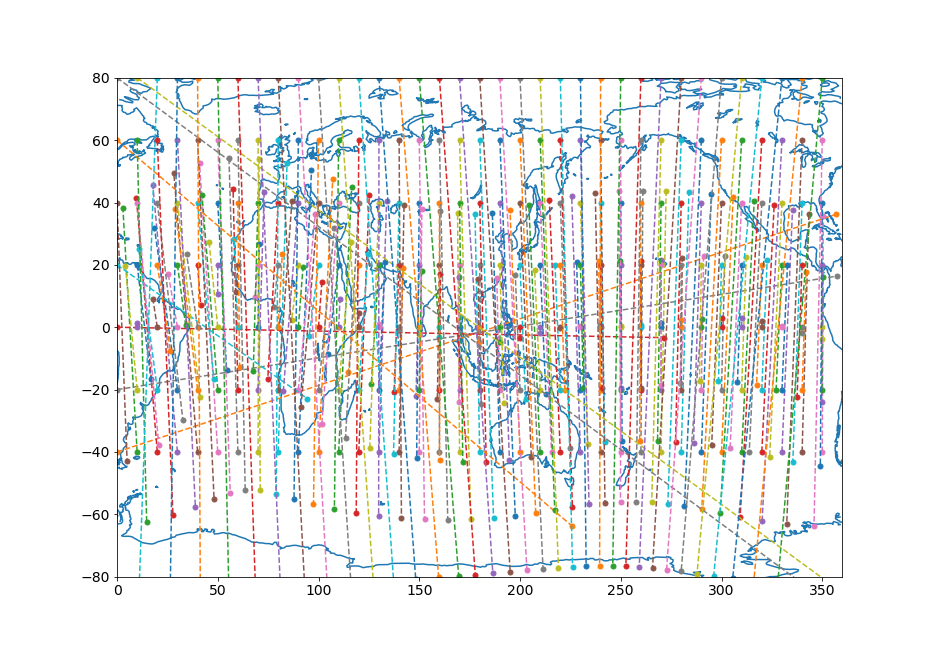

36.1993225575
()
()
38.2300185582
()
()
41.5629350859
()
()
45.6025930017
()
()
49.540490104
()
()
52.6087344415
()
()
54.189124727
()
()
54.0968346917
()
()
52.623778881
()
()
50.2619761512
()
()
47.5331700122
()
()
44.8344461766
()
()
42.4603746108
()
()
40.5422728042
()
()
39.0955634675
()
()
38.0099820936
()
()
37.1994417196
()
()
36.6409767944
()
()
36.4562790418
()
()
36.784068376
()
()
37.6929373351
()
()
39.0929942505
()
()
40.6943046762
()
()
42.145786799
()
()
43.1562217169
()
()
43.6726928697
()
()
43.8056072723
()
()
43.6698634689
()
()
43.2932675935
()
()
42.6629789538
()
()
41.7646471347
()
()
40.5927866156
()
()
39.1818034591
()
()
37.649297897
()
()
36.3140210791
()
()
35.6550208098
()
()
16.4196502558
()
()
19.6420877719
()
()
25.2382706693
()
()
31.8597417954
()
()
38.0591500478
()
()
42.5024112738
()
()
44.3089675338
()
()
43.4406996372
()
()
40.5550546287
()
()
36.4288790546
()
()
31.7318950401
()
()
27.2832598744
()
()
23.5700999294
()
()
20.8660288819
()
()
19.077

(-80, 80)

In [111]:
# A busy map of coordinates, their conjugate coordinates, and a line between them.
nlats = np.arange(-40,90,20)
nlons = np.arange(0,360,10)

inlats, inlons = np.meshgrid(nlats, nlons)

# conjcoords = igrfmap.conj_point(inlats.ravel(), inlons.ravel())

fig, ax = plt.subplots(1,1)
ax.plot(coast_lon_mag, coast_lat_mag)

for lat in nlats:
    for lon in nlons:
        conj_point = igrfmap.conj_point(lat, lon)
        ax.plot([lon, conj_point[1]], [lat, conj_point[0]],'.--',markersize=10)
#         ax.plot([lon, conj_point[1]], [lat, conj_point[0]],'.')


ax.set_xlim([0,360])
ax.set_ylim([-80,80])
# for row in mgrid[1:100,:]:
#     lat = row[1]
#     lon = row[2]
#     clat= row[4]
#     clon= row[5]
# #         conj_point = igrfmap.conj_point(lat, lon)
#     ax.plot([lon, clon], [lat, clat])


